In [1]:

#Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Load dataset
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.shape

(1459, 80)

In [9]:
#check null values
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

## Handle the missing values

In [10]:
## Fill Missing Values

test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].median())

In [11]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [12]:
test.shape

(1459, 80)

In [13]:
test['Alley'] = test['Alley'].fillna('None')

In [14]:
test.shape

(1459, 80)

In [15]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
test['PoolQC'] = test['PoolQC'].fillna('None')

#Arround 50% missing values attributes have been fill by None
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [16]:
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

In [17]:
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [18]:


test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

#test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [19]:
test.shape

(1459, 80)

In [20]:
test.drop(['Id'],axis=1,inplace=True)

In [21]:
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

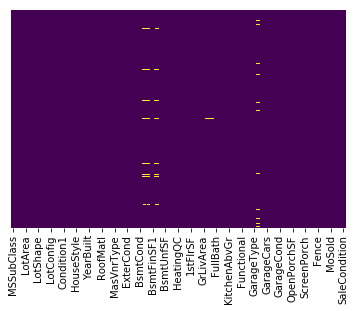

In [22]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

In [24]:
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])


In [25]:
test.loc[:, test.isnull().any()].head()


,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageYrBlt,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1961.0,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1958.0,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,1997.0,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,1998.0,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,1992.0,2.0,506.0,WD


In [26]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].median())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].median())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

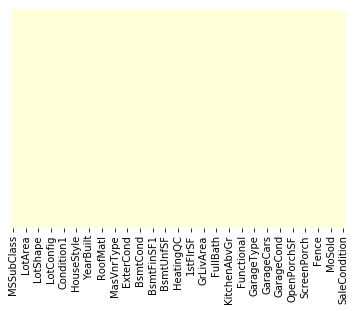

In [27]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [28]:
test.shape

(1459, 79)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


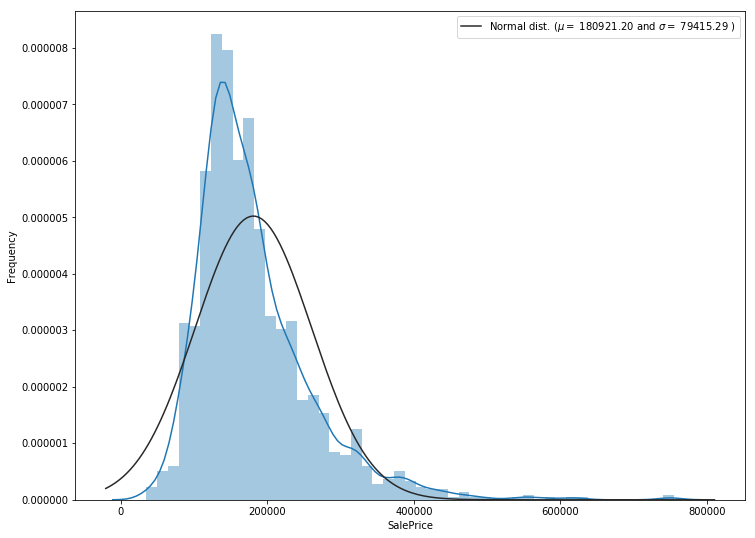

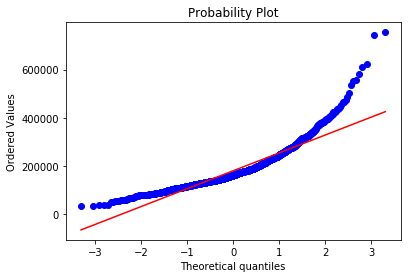

In [29]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


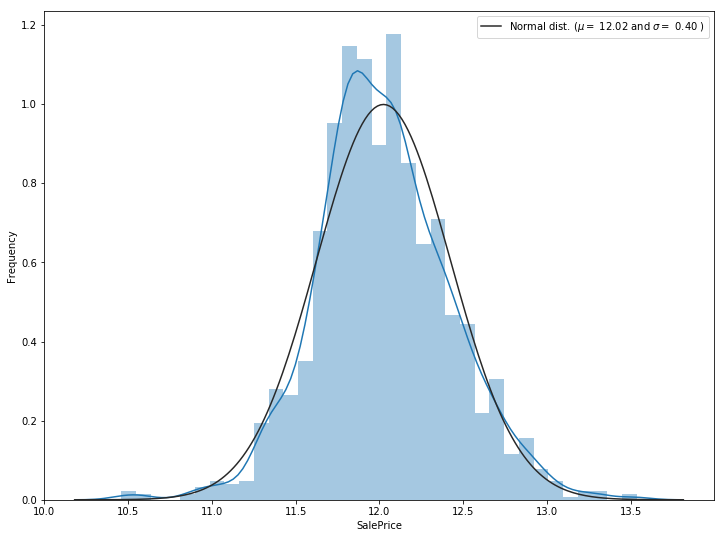

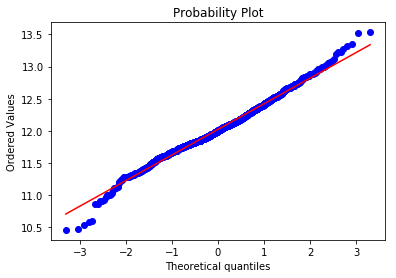

In [30]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Checking the missing values 

In [31]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

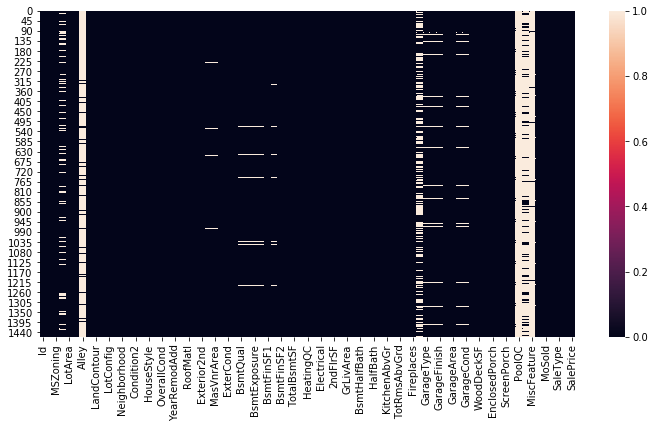

In [32]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [33]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [34]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [35]:
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

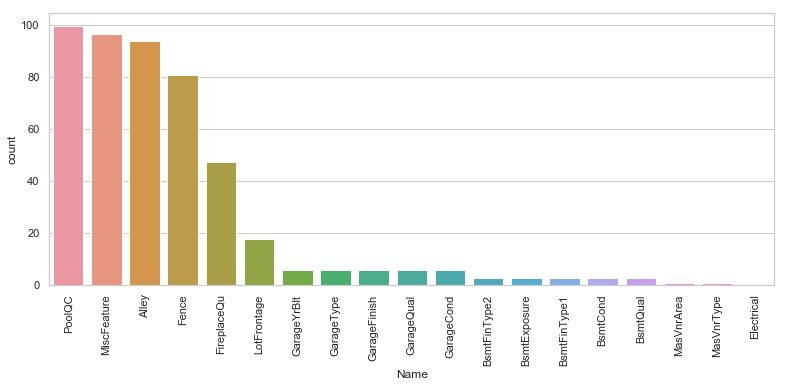

In [36]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

## Corralation between train attributes

In [37]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [38]:
train_corr.shape

(1460, 38)

In [39]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

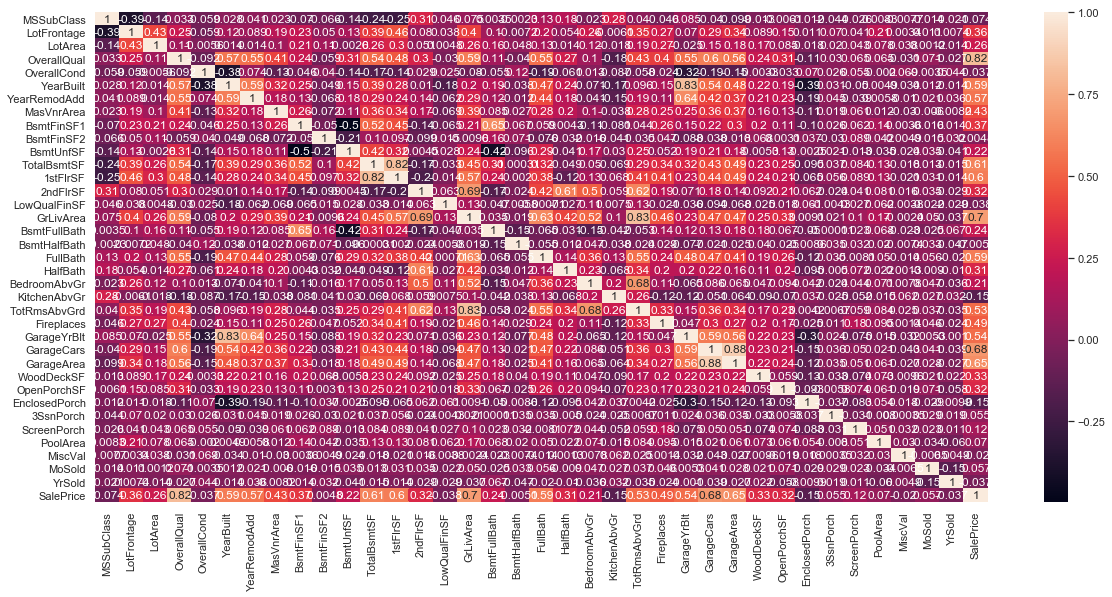

In [40]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

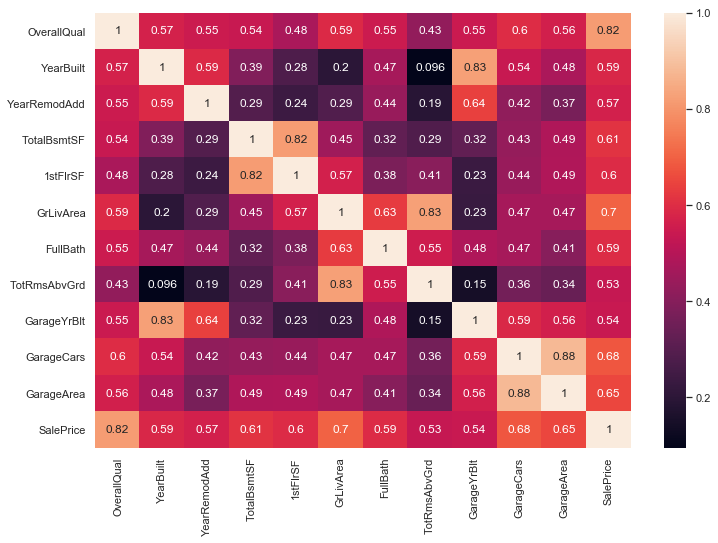

In [41]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here OverallQual is highly correlated with target feature of saleprice by 82%

In [42]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


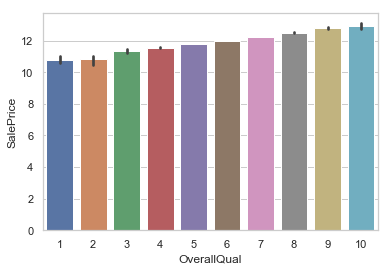

In [43]:
sns.barplot(train.OverallQual, train.SalePrice)

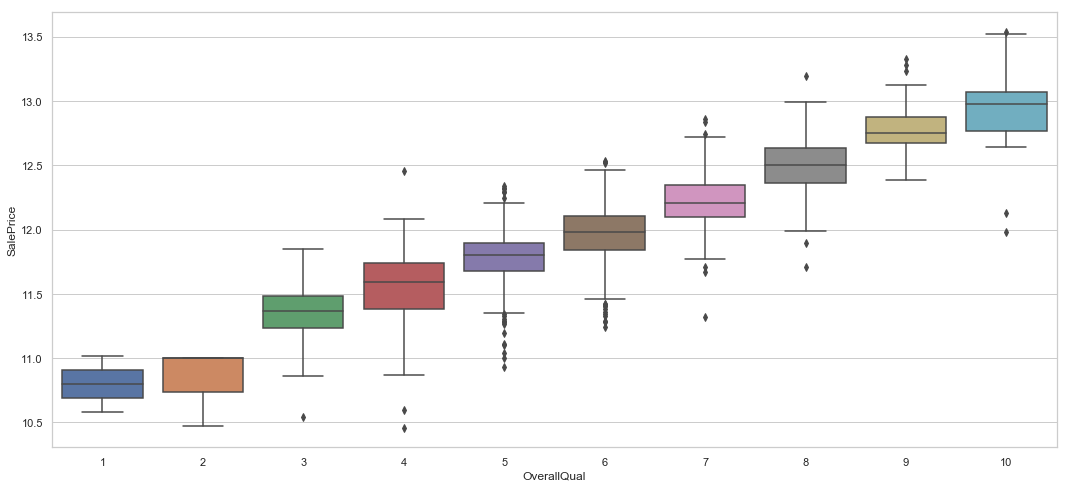

In [44]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

In [45]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## Imputting missing values

In [46]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [47]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [48]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [49]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [50]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [51]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [52]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [53]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')


#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

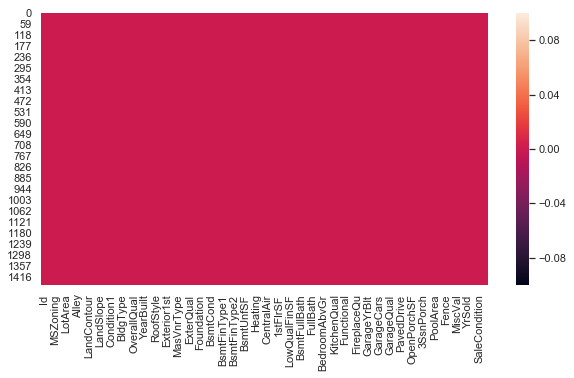

In [54]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

Now , there is no missing value

In [55]:
train.shape

(1460, 80)

In [56]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

### Encoding str to int 

In [57]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [58]:
test['GarageYrBlt']

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
5       1993.0
6       1992.0
7       1998.0
8       1990.0
9       1970.0
10      1999.0
11      1971.0
12      1997.0
13      1975.0
14      1975.0
15      2009.0
16      2009.0
17      2005.0
18      2005.0
19      2003.0
20      2002.0
21      2006.0
22      2005.0
23      2006.0
24      2004.0
25      2004.0
26      1998.0
27      2005.0
28      2009.0
29      2005.0
         ...  
1429    1925.0
1430    1957.0
1431    1979.0
1432    1979.0
1433    1979.0
1434    2005.0
1435    2004.0
1436    1979.0
1437    1978.0
1438    2001.0
1439    1975.0
1440    1958.0
1441    2000.0
1442    2005.0
1443    2005.0
1444    1951.0
1445    1997.0
1446    1977.0
1447    1968.0
1448    1970.0
1449    1979.0
1450    1972.0
1451    1969.0
1452    1970.0
1453    1979.0
1454    1979.0
1455    1970.0
1456    1960.0
1457    1979.0
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [59]:
# Categorical boolean mask
categorical_feature_mask = test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = test.columns[categorical_feature_mask].tolist()

In [60]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [61]:
# apply le on categorical feature columns
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col))


In [62]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,8,4
3,60,3,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,8,4
4,120,3,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,8,4


##  Prepraring data for prediction

In [263]:
#Take targate variable into y
y = train['SalePrice']

#Delete the saleprice
del train['SalePrice']

In [264]:
#Take their values in X and y
X = train.values
y = y.values


In [265]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Linear Regression 

In [266]:
# Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()


#Fit the model
model.fit(X_train, y_train)

#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Predict value [11.62221633]
Real value 11.767187766223199
Accuracy -->  89.26708677161491


### GradientBoostingRegressor 

In [267]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

#Fit
GBR.fit(X_train, y_train)

print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.83335809783205


### XGBoost Regressor 

In [278]:
import xgboost
classifier=xgboost.XGBRegressor()

#Fit
classifier.fit(X_train, y_train)

print("Accuracy --> ", classifier.score(X_test, y_test)*100)

[10:30:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy -->  90.37132138036038


In [268]:
y_test.shape, y_train.shape, X_train.shape, X_test.shape

((292,), (1168,), (1168, 79), (292, 79))

In [281]:
y_pred=classifier.predict(test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78'] ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
expected f11, f69, f58, f31, f74, f25, f52, f19, f26, f66, f65, f28, f62, f61, f4, f78, f72, f5, f48, f29, f57, f70, f49, f27, f10, f34, f64, f30, f36, f13, f35, f37, f41, f22, f59, f32, f23, f67, f7, f20, f60, f12, f63, f68, f40, f51, f33, f77, f73, f38, f56, f76, f24, f39, f18, f75, f9, f14, f1, f16, f54, f0, f42, f43, f3, f8, f71, f53, f44, f47, f21, f17, f6, f45, f15, f46, f2, f55, f50 in input data
training data did not have the following fields: HeatingQC, GarageType, YearBuilt, ExterQual, Street, Alley, BsmtFullBath, GarageYrBlt, PoolArea, MSSubClass, Exterior2nd, Neighborhood, CentralAir, RoofStyle, LowQualFinSF, KitchenQual, BsmtQual, BsmtFinSF2, GrLivArea, ScreenPorch, LotArea, BsmtCond, YrSold, WoodDeckSF, Exterior1st, Foundation, TotalBsmtSF, LandSlope, BsmtFinSF1, OpenPorchSF, MoSold, GarageFinish, OverallQual, HalfBath, TotRmsAbvGrd, MSZoning, Electrical, BsmtFinType2, EnclosedPorch, SaleCondition, MiscFeature, GarageQual, KitchenAbvGr, BsmtHalfBath, PavedDrive, 3SsnPorch, LotConfig, Utilities, BsmtExposure, MasVnrArea, FireplaceQu, BldgType, SaleType, Condition2, GarageCond, Fireplaces, 1stFlrSF, Heating, RoofMatl, Functional, 2ndFlrSF, MasVnrType, BsmtUnfSF, FullBath, Condition1, Fence, LotShape, PoolQC, ExterCond, GarageCars, BsmtFinType1, GarageArea, BedroomAbvGr, OverallCond, LandContour, HouseStyle, MiscVal, LotFrontage, YearRemodAdd

In [280]:
y_pred

array([-4.7291479 , -5.60256183, -5.39415372, ..., -9.33512527,
       -3.9006823 , -2.95846131])

# Create Sample Submission file and Submit

In [272]:
##Create Sample Submission file and Submit using GradientBoostingRegressor
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_1.csv',index=False)

In [274]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [277]:
datasets

,Id,SalePrice
0,1461,11.648071
1,1462,11.839256
2,1463,12.065997
3,1464,12.080236
4,1465,12.078432
5,1466,12.010466
6,1467,11.935675
7,1468,11.945347
8,1469,12.068162
9,1470,11.694580


# Create Sample Submission file and Submit

In [64]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [65]:
datasets

,Id,SalePrice
0,1461,126799.043522
1,1462,158740.451090
2,1463,192768.529874
3,1464,198209.426186
4,1465,184723.306061
5,1466,168863.144357
6,1467,175195.291937
7,1468,167189.666144
8,1469,181525.329884
9,1470,127725.883841
